### This notebook is about transformers and applying the MLPClassfier as a Neural Network with two hidden layers to predict whether the reviewer has a good or unsatisfied perception of the product.

#### Load useful libraries and df

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, f1_score, classification_report, accuracy_score, roc_curve

from tqdm import tqdm

import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /Users/janice/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/janice/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Import the datasets from notebook 2.

In [2]:
# Load df
df = pd.read_csv(
    "../data/chatgpt_after_datacleaning.csv",
    encoding="utf-8",
)

df_long = pd.read_csv(
    "../data/chatgpt-long_after_datacleaning.csv",
    encoding="utf-8",
)

# var for review received response
df["score_cat"] = np.where(df.score == 5, "positive", np.where(df.score == 4, "neutral", "negative"))

In [3]:
# Looking at a sample of our df
df.sample()

,Unnamed: 0,reviewId,userName,content,score,thumbsUpCount,at,replyContent,repliedAt,appVersion,at_ymd,at_q,at_ym,at_m,at_wd,score_cat
18602,18602,315603f0-cb66-403f-9fb2-2df2a4fa0742,Planet X,Done not work,1,0,2023-07-26 15:25:15,NaN,NaN,1.0.0022,07/26/23,3,2023-07,July,Wednesday,negative


In [4]:
#from transformers import pipeline
#import torch

# Modeling with bag of words and tfidf

Creating a function and pipeline for data preparation

In [5]:
import string 
import spacy
from spacy.lang.en.stop_words import STOP_WORDS 
from spacy.lang.en import English

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load("en_core_web_sm")
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = nlp(sentence)
    # Lemmatizing each token and converting each token into lowercase
    mytokens = [token.lemma_.lower().strip() if token.lemma_ != "-PRON-" else token.lower_ for token in mytokens]
    # Removing stop words
    mytokens = [token for token in mytokens if token not in stop_words and token not in punctuations ]
    # return preprocessed list of tokens
    print(mytokens)
    return mytokens

In [6]:
spacy_tokenizer("I'll try something this is my sentence about features i am loving")

['try', 'sentence', 'feature', 'love']


['try', 'sentence', 'feature', 'love']

In [7]:
# We create our bag of words (bow) using our tokenizer and defining an ngram range
bow = CountVectorizer (tokenizer = spacy_tokenizer, ngram_range= (1,1))

In [8]:
# Using Tfidf
tfvectorizer = TfidfVectorizer(tokenizer = spacy_tokenizer)

In [17]:
from sklearn.base import TransformerMixin

# This function will clean the text
def clean_text(text):
    return str(text).strip().lower()

#Custom transformer using Python standard library (you could use spacy as well)
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]
    
    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

In [10]:
# Split dataset between train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df['content'], df['score_cat'], random_state=0
)

In [11]:
X_train.head()

25900                                    Superb experience
11411    Waited for the app for too long,Now,It's here,...
11831                 need to enable the copy to clipboard
7576     Very useful for those who need opinions of oth...
27941                                        Excellent app
Name: content, dtype: object

In [12]:
# Multi layer perceptron
from sklearn.neural_network import MLPClassifier
classifier_MLP = MLPClassifier(max_iter=400, hidden_layer_sizes= (100,2), verbose=True)

In [13]:
from sklearn.pipeline import Pipeline

# Create the pipeline to clean, tokenize, vectorize, and classify
pipe = Pipeline([   ("cleaner", predictors()),
                    ('vectorizer', tfvectorizer), 
                    ('classifier', classifier_MLP)],
                    verbose=True)

In [18]:
# Fit our data
pipe.fit(X_train, y_train)

[Pipeline] ........... (step 1 of 3) Processing cleaner, total=   0.0s
['superb', 'experience']
['wait', 'app', 'long', 'thank', 'chatgpt']
['need', 'enable', 'copy', 'clipboard']
['useful', 'need', 'opinion', 'ai', 'app', 'app', 'info', 'web', 'accurate']
['excellent', 'app']
['good']
['excite', 'long', 'time.this', 'app', 'futuristic']
['helpful', 'app']
['good', 'home', 'work', 'story', 'ad']
['need', 'chrome', 'login']
['awesome']
['good', 'ai', 'update', 'good', 'thank', 'de', 'create', 'good']


/Users/janice/Documents/Bootcamp/Git/Capstone/capstone_chat-gpt/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


['100', 'unnecessary', 'provide', 'email', 'phone', 'number', 'identification', 'purpose', 'clearly', 'mean', 'steal', 'datum', 'try', 'hide', 'app', 'easily', 'use', 'provide', 'thing', 'point', 'app', 'send', 'datum', 'learn', 'conversation', 'create', 'realistic', 'response', 'need', 'know', 'identity', 'report', 'app', 'disgusting', 'behavior']
['wow', 'nice']
['nice']
['actually', 'amazingly', 'helpful', 'work', 'good', 'app']
['great', 'interface', 'response']
['nice', 'animation']
['truly', 'witness', 'future', 'eye', 'clear', 'concise', 'information', 'concept', 'month', 'year', 'hash', 'condense', 'second']
['amazing']
['great', '❤', '️', 'expect', 'feature', 'future', 'update']
['good', 'app', 'study', 'app', 'life', 'changer', 'hope', 'app', 'pay', 'ply', 'open', 'ai', 'developer', 'app', 'pay', 'thank']
['app', 'excellent']
['excellent']
['original']
['helpful', 'good', 'thing', 'know', 'pakistani', 'language', 'appreciate']
['pleasantly', 'surprised', 'effective', 'persona

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x292c7abd0>),
                ('vectorizer',
                 TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x292882700>)),
                ('classifier',
                 MLPClassifier(hidden_layer_sizes=(100, 2), max_iter=400,
                               verbose=True))],
         verbose=True)

In [ ]:
# Predict the transformed test documents
predict_probab = pipe.predict_proba(X_test)
predictions = pipe.predict(X_test)

# print("F1 = {:.3f}".format(f1_score(y_test, predictions)))
# print("AUC = {:.3f}".format(roc_auc_score(y_test, predict_probab)))

['work', 'chrome', 'instal', 'company', 'dumb', 'evil', '..']
['nice', 'love', '💕']
['nice', 'ai', 'test', 'day', 'week', 'come', 'edit', 'final', 'review']
['amazing']
['highlight', 'code', 'example', 'code', 'section', 'currently', 'demo', 'code', 'look', 'ugly', 'messy']
['nice.feature', 'good']
['le', 'falta', 'el', 'code', 'interpreter', 'y', 'el', 'modelo', 'de', 'plugins', 'para', 'los', 'que', 'pagamos', 'el', 'plus', 'la', 'transición', 'del', 'principio', 'que', 'aparece', 'en', 'la', 'pantalla', 'al', 'abrir', 'la', 'aplicación', 'parece', 'innecesaria', 'por', 'lo', 'dema', 'pasable', 'la', 'uso', 'porque', 'gpt4', 'es', 'una', 'maravilla', 'pero', 'la', 'hora', 'de', 'la', 'usabilidad', 'le', 'falta', 'todavía', 'la', 'aplicación', 'de', 'claude', 'parece', 'perfecta', 'si', 'la', 'haceis', 'parecida', 'ganais', 'un', 'monton', 'de', 'usuarios', 'seguro']
['good', 'app']
['nice', '...', '👍', '👌', '👍', '👌']
['finnally', 'chat', 'gpt', 'google', 'play', 'apple', 'appstore']


In [22]:
#score=accuracy_score(y_test, pipe.predict(X_test), )
# fpr, tpr, thresholds = roc_curve(y_test, pipe.predict_proba(X_test)[:,1])
# roc=roc_auc_score(y_test, pipe.predict_proba(X_test)[:,1])
cr=classification_report(y_test, pipe.predict(X_test))

['work', 'chrome', 'instal', 'company', 'dumb', 'evil']
['nice', 'love']
['nice', 'air', 'test', 'day', 'week', 'come', 'edit', 'final', 'review']
['amazing']
['highlight', 'code', 'example', 'code', 'section', 'currently', 'demo', 'code', 'look', 'ugly', 'messy']
['nice.feature', 'good']
['le', 'alta', 'el', 'code', 'interpreter', 'y', 'el', 'model', 'de', 'plains', 'para', 'los', 'que', 'pajamas', 'el', 'plus', 'la', 'transition', 'del', 'principio', 'que', 'parece', 'en', 'la', 'patella', 'al', 'air', 'la', 'aplicación', 'parece', 'innecesaria', 'por', 'lo', 'demos', 'payable', 'la', 'uso', 'porque', 'es', 'una', 'maravilla', 'pero', 'la', 'hora', 'de', 'la', 'usabilidad', 'le', 'alta', 'todavía', 'la', 'aplicación', 'de', 'claude', 'parece', 'perfect', 'si', 'la', 'hace', 'parecida', 'gang', 'un', 'wonton', 'de', 'usuarios', 'seguro']
['good', 'app']
['nice', '...', '👍', '👌', '👍', '👌']
['finally', 'chat', 'google', 'play', 'apple', 'appstore']
['great', 'app']
['excellent', 'soluti

In [21]:
cr

NameError: name 'cr' is not defined

<Axes: >

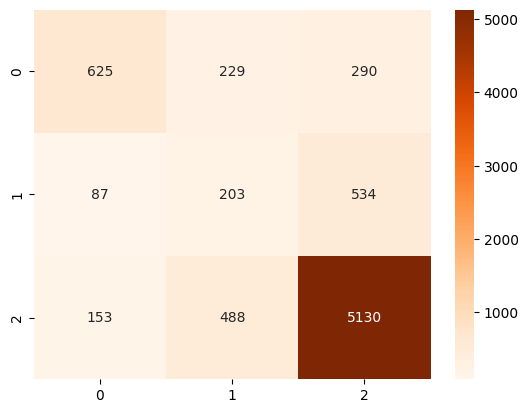

In [ ]:
#Confusion matrix using pandas crosstab
conf_matrix = confusion_matrix(y_test, predictions)
ax= plt.subplot()
sns.heatmap(conf_matrix, annot=True, cmap=plt.cm.Oranges, fmt='g')

# labels, title and ticks
#ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
#ax.set_title('Confusion Matrix'); 
#ax.xaxis.set_ticklabels(['business', 'health']); ax.yaxis.set_ticklabels(['health', 'business']);